<h1 align="center">Tarea 1 </h1>

- Nombre: Mateo Orozco Baldovino
- Especializacion en Estadistica Aplicada UTB

Punto 1:

In [22]:
# Importando librerias para analizar los datos
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

In [19]:
img = cv.imread('Tarea1\imagenpajaros.jpg')

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Mateo\AppData\Local\Temp\ipykernel_6084\1329533516.py:1: SyntaxWarning: invalid escape sequence '\i'
  img = cv.imread('Tarea1\imagenpajaros.jpg')


In [20]:
print("The shape of image is =",np.shape(img))

The shape of image is = ()


TypeError: Image data of dtype object cannot be converted to float

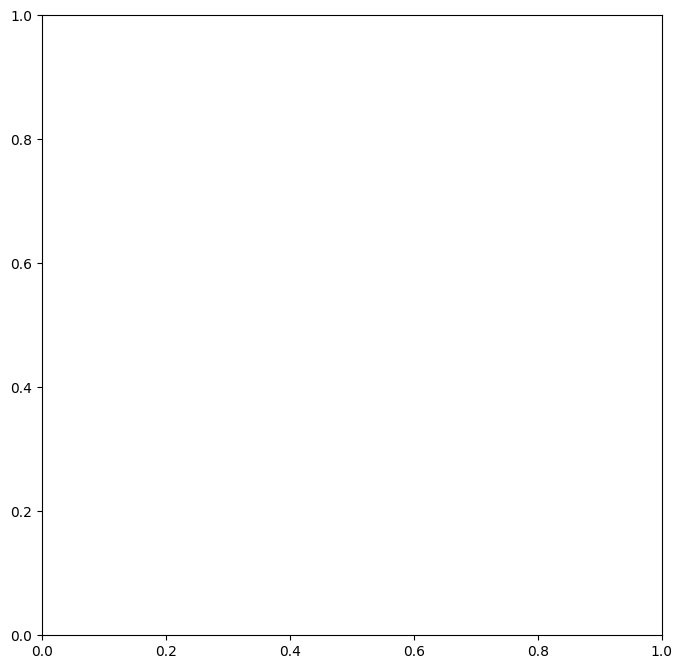

In [21]:
plt.figure(figsize=(8,9))
plt.imshow(img)
plt.show()

In [6]:
from skimage import io, color

In [7]:
img2=cv.cvtColor(img,cv.COLOR_BGR2RGB)

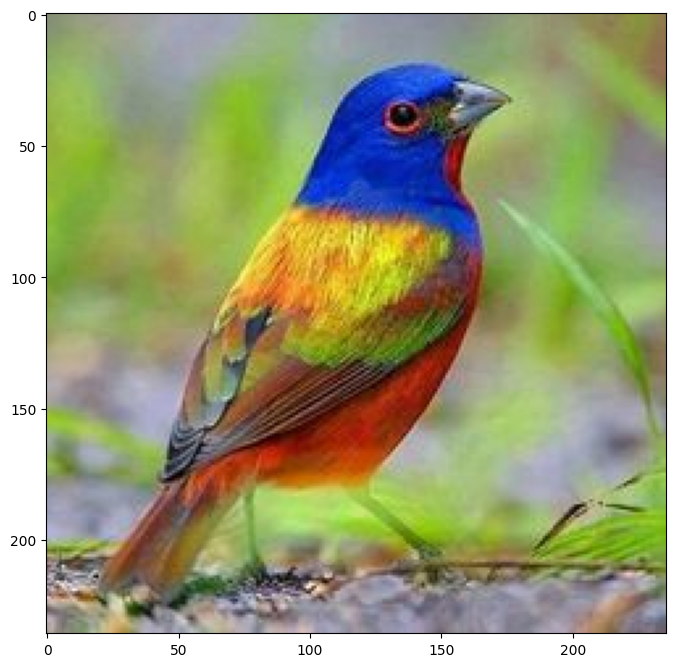

In [8]:
plt.figure(figsize=(8,9))
plt.imshow(img2)
plt.show()

In [9]:
img3=cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

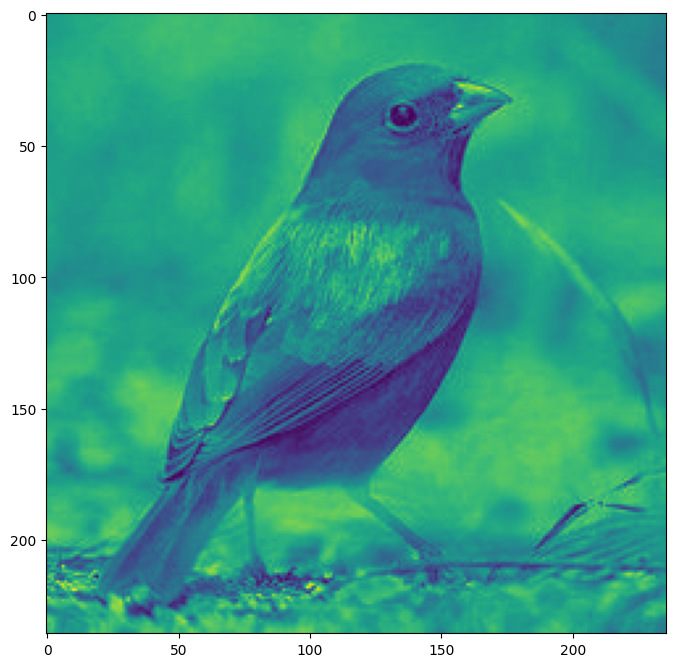

In [10]:
plt.figure(figsize=(8,9))
plt.imshow(img3)
plt.show()

In [11]:
r,g,b=cv.split(img2)

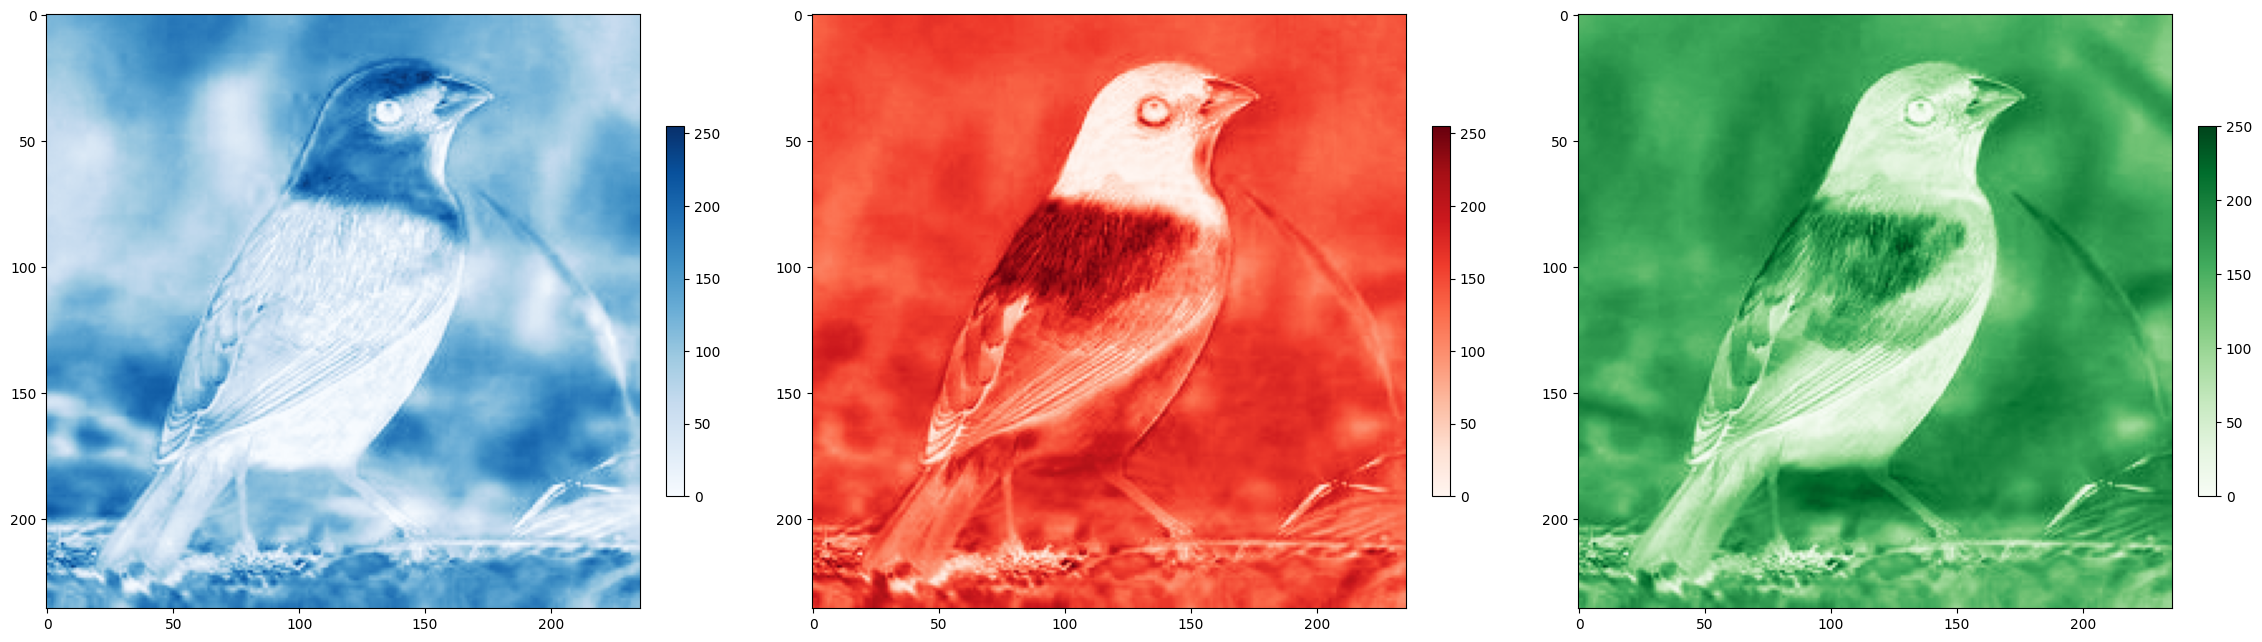

In [12]:
plt.figure(figsize=(28,19))
plt.subplot(131)
im=plt.imshow(b,cmap="Blues")
plt.colorbar(im,fraction=0.029, pad=0.04)
plt.subplot(132)
im=plt.imshow(r,cmap="Reds")
plt.colorbar(im,fraction=0.029, pad=0.04)
plt.subplot(133)
im=plt.imshow(g,cmap="Greens")
plt.colorbar(im,fraction=0.029, pad=0.04)
plt.show()

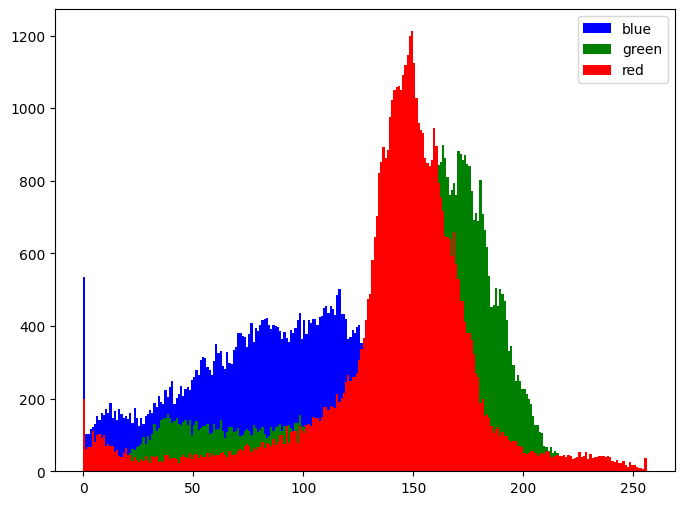

In [13]:
plt.figure(figsize=(8,6))
plt.hist(b.ravel(),bins=256,range=(0,256),color='b',label='blue')
plt.hist(g.ravel(),bins=256,range=(0,256),color='g',label='green')
plt.hist(r.ravel(),bins=256,range=(0,256),color='r',label='red')
plt.legend()
plt.show()

Canal rojo
La distribución roja se extiende desde valores bajos pero presenta un pico muy pronunciado alrededor de intensidades cercanas a 140‑160, con una caída progresiva hacia la derecha, lo que indica que la mayoría de los píxeles tienen niveles de rojo medios y relativamente parecidos entre sí. Esto concuerda con la menor varianza y coeficiente de variación que observaste, lo que hace que el canal rojo sea el más uniforme en la imagen.​

Canal verde
El canal verde aparece desplazado a la derecha respecto al azul y bastante solapado con la parte alta del rojo, con máximos alrededor de 150‑180 y una cola que se extiende hacia valores más bajos. Esto refleja que buena parte de la imagen tiene verdes intensos o medios, pero con más dispersión que el rojo, consistente con su asimetría negativa más marcada.​

Canal azul
El azul tiene un comportamiento distinto: concentra muchos píxeles en intensidades bajas‑medias (aprox. 0‑120), con un pico notable cerca de 0 y luego una subida progresiva y más plana sin un máximo tan agudo como el rojo. Esto indica que hay abundancia de zonas muy oscuras en azul y una variación amplia, lo que se refleja en su coeficiente de variación más alto y en el hecho de que aporte gran parte del contraste cromático de la imagen.

In [17]:
# Calcule para cada arreglo las medidas de tendencia central, las medidas de dispersión y las medidas de simetría correspondientes, también las medidas de variabilidad o coeficiente de variabilidad o coeficiente de Pearson. Diga si las medidas son robustas o no.

def calcular_estadisticas(arreglo, nombre_color):
    media = np.mean(arreglo)
    mediana = np.median(arreglo)
    moda = np.bincount(arreglo.ravel()).argmax()
    varianza = np.var(arreglo)
    desviacion_std = np.std(arreglo)
    asimetria = (3 * (media - mediana)) / desviacion_std if desviacion_std != 0 else 0
    coef_variacion = (desviacion_std / media) * 100 if media != 0 else 0

    print(f"Estadísticas para el canal {nombre_color}:")
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")
    print(f"Moda: {moda}")
    print(f"Varianza: {varianza}")
    print(f"Desviación estándar: {desviacion_std}")
    print(f"Asimetría (Coef. de Pearson): {asimetria}")
    print(f"Coeficiente de variación: {coef_variacion}%")
    print()

In [18]:
# Separar canales
b, g, r = cv.split(img)

# Llamar la función para cada canal
calcular_estadisticas(b, "Azul")
calcular_estadisticas(g, "Verde")
calcular_estadisticas(r, "Rojo")

Estadísticas para el canal Azul:
Media: 101.71976443550705
Mediana: 102.0
Moda: 0
Varianza: 2455.638718818396
Desviación estándar: 49.55440160892265
Asimetría (Coef. de Pearson): -0.016965328329733857
Coeficiente de variación: 48.71659100266735%

Estadísticas para el canal Verde:
Media: 144.99946136167767
Mediana: 159.0
Moda: 163
Varianza: 2161.1804435478466
Desviación estándar: 46.48849797044261
Asimetría (Coef. de Pearson): -0.903484039034163
Coeficiente de variación: 32.06115218213437%

Estadísticas para el canal Rojo:
Media: 140.94886526860097
Mediana: 147.0
Moda: 149
Varianza: 1566.2797753570271
Desviación estándar: 39.576252669461105
Asimetría (Coef. de Pearson): -0.45869436770109145
Coeficiente de variación: 28.078447168795666%



Canal azul: En el canal azul la media y la mediana son muy similares, lo que indica una distribución casi simétrica de intensidades alrededor de un valor intermedio, aunque la moda en 0 revela una gran cantidad de píxeles muy oscuros que generan alto contraste. La desviación estándar y el coeficiente de variación son elevados, por lo que el azul presenta mucha variabilidad relativa dentro de la imagen.​

Canal verde: En el canal verde la media es menor que la mediana y la moda, lo que corresponde a una asimetría negativa, con predominio de tonos verdes medios‑claros y una cola hacia valores más oscuros. Aunque su desviación estándar es alta, el coeficiente de variación es menor que en azul, de modo que el verde es algo más homogéneo en proporción a su intensidad promedio.​

Canal rojo: En el canal rojo también se observa media menor que mediana y moda, lo que indica sesgo negativo moderado y predominio de tonos rojos relativamente claros frente a pocos píxeles muy oscuros. Es el canal con menor varianza y coeficiente de variación, por lo que las intensidades rojas están más concentradas alrededor de su media y aportan una apariencia más uniforme que los otros canales.

In [19]:
# Punto 4

def clasificar_intensidad(canal):
    # Crear un arreglo vacío del mismo tamaño para guardar las categorías
    categorias = np.empty(canal.shape, dtype=object)

    # Aplicar las reglas
    categorias[canal <= 85] = "Oscuro"
    categorias[(canal > 85) & (canal <= 170)] = "Medio"
    categorias[canal > 170] = "Claro"

    return categorias

# Separar canales RGB
b, g, r = cv.split(img2)   # ya tienes img2 en formato RGB en tu notebook

# Clasificar cada canal
b_cat = clasificar_intensidad(b)
g_cat = clasificar_intensidad(g)
r_cat = clasificar_intensidad(r)

print("Ejemplo de canal Azul categorizado:")
print(b_cat)

print("Ejemplo de canal Verde categorizado:")
print(g_cat)

print("Ejemplo de canal Rojo categorizado:")
print(r_cat)


Ejemplo de canal Azul categorizado:
[['Medio' 'Medio' 'Medio' ... 'Medio' 'Medio' 'Medio']
 ['Medio' 'Medio' 'Medio' ... 'Medio' 'Medio' 'Medio']
 ['Medio' 'Medio' 'Medio' ... 'Medio' 'Medio' 'Medio']
 ...
 ['Claro' 'Claro' 'Claro' ... 'Medio' 'Medio' 'Medio']
 ['Claro' 'Claro' 'Claro' ... 'Medio' 'Medio' 'Medio']
 ['Medio' 'Claro' 'Claro' ... 'Medio' 'Medio' 'Medio']]
Ejemplo de canal Verde categorizado:
[['Medio' 'Medio' 'Medio' ... 'Medio' 'Medio' 'Medio']
 ['Medio' 'Medio' 'Medio' ... 'Medio' 'Medio' 'Medio']
 ['Medio' 'Medio' 'Medio' ... 'Medio' 'Medio' 'Medio']
 ...
 ['Medio' 'Medio' 'Claro' ... 'Medio' 'Medio' 'Medio']
 ['Medio' 'Medio' 'Claro' ... 'Medio' 'Medio' 'Medio']
 ['Medio' 'Medio' 'Medio' ... 'Medio' 'Medio' 'Medio']]
Ejemplo de canal Rojo categorizado:
[['Medio' 'Medio' 'Medio' ... 'Oscuro' 'Oscuro' 'Oscuro']
 ['Medio' 'Medio' 'Medio' ... 'Oscuro' 'Oscuro' 'Oscuro']
 ['Medio' 'Medio' 'Medio' ... 'Oscuro' 'Oscuro' 'Oscuro']
 ...
 ['Medio' 'Medio' 'Claro' ... 'Medio' 'M

Los criterios de clasificación que estás usando toman el valor de intensidad de cada píxel en un canal (un número entre 0 y 255 para imágenes de 8 bits) y lo convierten en una categoría cualitativa según tres rangos fijos de luminosidad. En tu función, cualquier valor menor o igual a 85 se etiqueta como “Oscuro”, de 86 a 170 como “Medio” y mayor que 170 como “Claro”, de modo que cada píxel azul, verde o rojo queda clasificado según cuánta luz aporta ese canal en ese punto. Estos umbrales dividen aproximadamente el rango total en tres tramos similares, lo que permite describir estadísticamente la imagen (por ejemplo, porcentaje de píxeles oscuros, medios o claros) sin trabajar directamente con los valores numéricos continuos.​

In [26]:
# Ahora suponga que la escala de cada color, la cual es un número que va en el intervalo [0,255] usted la divide en [”Claro”, ”Medio”, ”Oscuro”], bajo un criterio que usted elabore. Construya un nuevo arreglo (para cada canal) con estos datos.
def categorizar_intensidad(canal):
    categorias = np.empty(canal.shape, dtype=object)
    categorias[canal < 85] = 'Oscuro'
    categorias[(canal >= 85) & (canal < 170)] = 'Medio'
    categorias[canal >= 170] = 'Claro'
    return categorias


categorias_r = categorizar_intensidad(r)
categorias_g = categorizar_intensidad(g)
categorias_b = categorizar_intensidad(b)





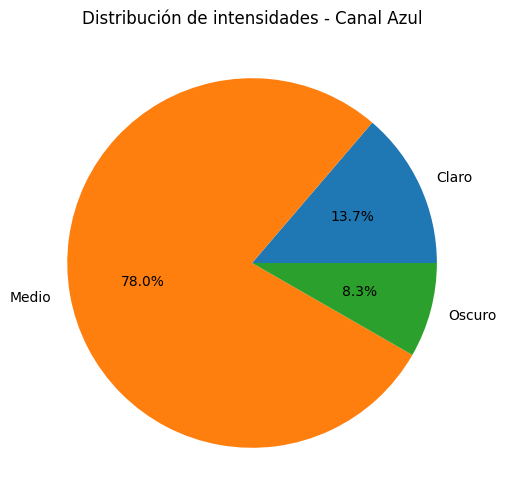

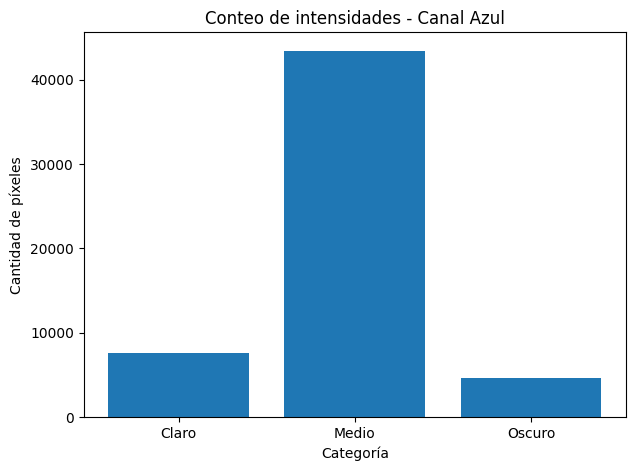


Interpretación del canal Azul:
 - Claro: 13.73%
 - Medio: 77.98%
 - Oscuro: 8.29%
>>> El canal Azul es equilibrado, sin extremos marcados.

--------------------------------------------------



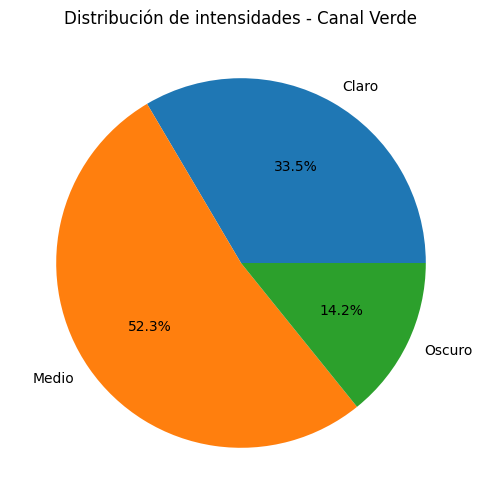

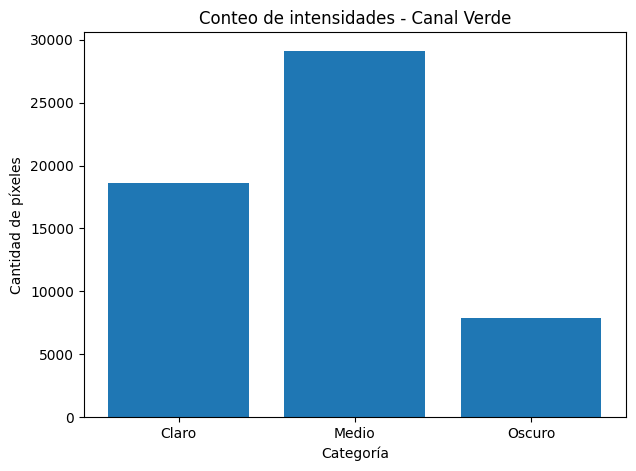


Interpretación del canal Verde:
 - Claro: 33.49%
 - Medio: 52.32%
 - Oscuro: 14.19%
>>> El canal Verde es equilibrado, sin extremos marcados.

--------------------------------------------------



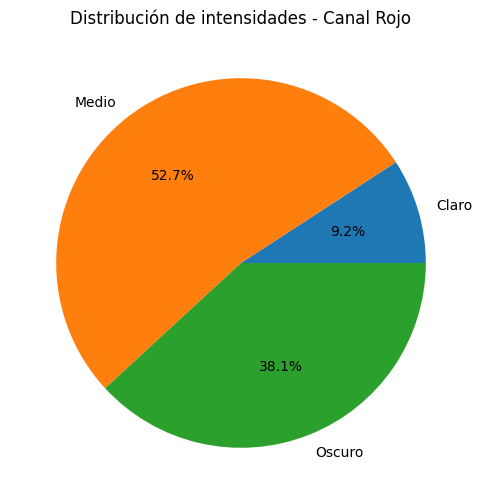

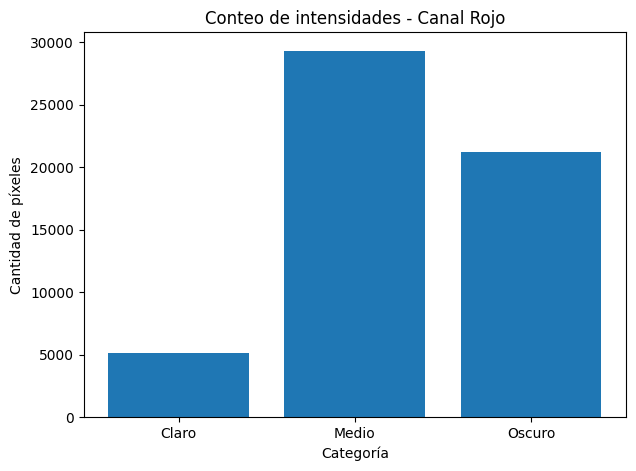


Interpretación del canal Rojo:
 - Claro: 9.18%
 - Medio: 52.68%
 - Oscuro: 38.14%
>>> El canal Rojo es equilibrado, sin extremos marcados.

--------------------------------------------------



In [27]:
# Función para graficar y analizar cada canal
def graficos_y_analisis(categorias, nombre_canal):
    # Contar categorías
    valores, conteo = np.unique(categorias, return_counts=True)

    # ==== GRÁFICO DE TORTA ====
    plt.figure(figsize=(6,6))
    plt.pie(conteo, labels=valores, autopct='%1.1f%%')
    plt.title(f"Distribución de intensidades - Canal {nombre_canal}")
    plt.show()

    # ==== GRÁFICO DE BARRAS ====
    plt.figure(figsize=(7,5))
    plt.bar(valores, conteo)
    plt.title(f"Conteo de intensidades - Canal {nombre_canal}")
    plt.xlabel("Categoría")
    plt.ylabel("Cantidad de píxeles")
    plt.show()

    # ==== INTERPRETACIÓN AUTOMÁTICA ====
    total = conteo.sum()
    porcentajes = conteo / total * 100

    print(f"\nInterpretación del canal {nombre_canal}:")
    for val, p in zip(valores, porcentajes):
        print(f" - {val}: {p:.2f}%")

    # Análisis simple basado en predominio
    dominante = valores[np.argmax(conteo)]

    if dominante == "Claro":
        print(f">>> El canal {nombre_canal} muestra una imagen luminosa en este color.")
    elif dominante == "Medio":
        print(f">>> El canal {nombre_canal} es equilibrado, sin extremos marcados.")
    else:
        print(f">>> El canal {nombre_canal} tiende a tonos oscuros y apagados.")

    print("\n" + "-"*50 + "\n")

# Ejecutar para cada canal
graficos_y_analisis(b_cat, "Azul")
graficos_y_analisis(g_cat, "Verde")
graficos_y_analisis(r_cat, "Rojo")

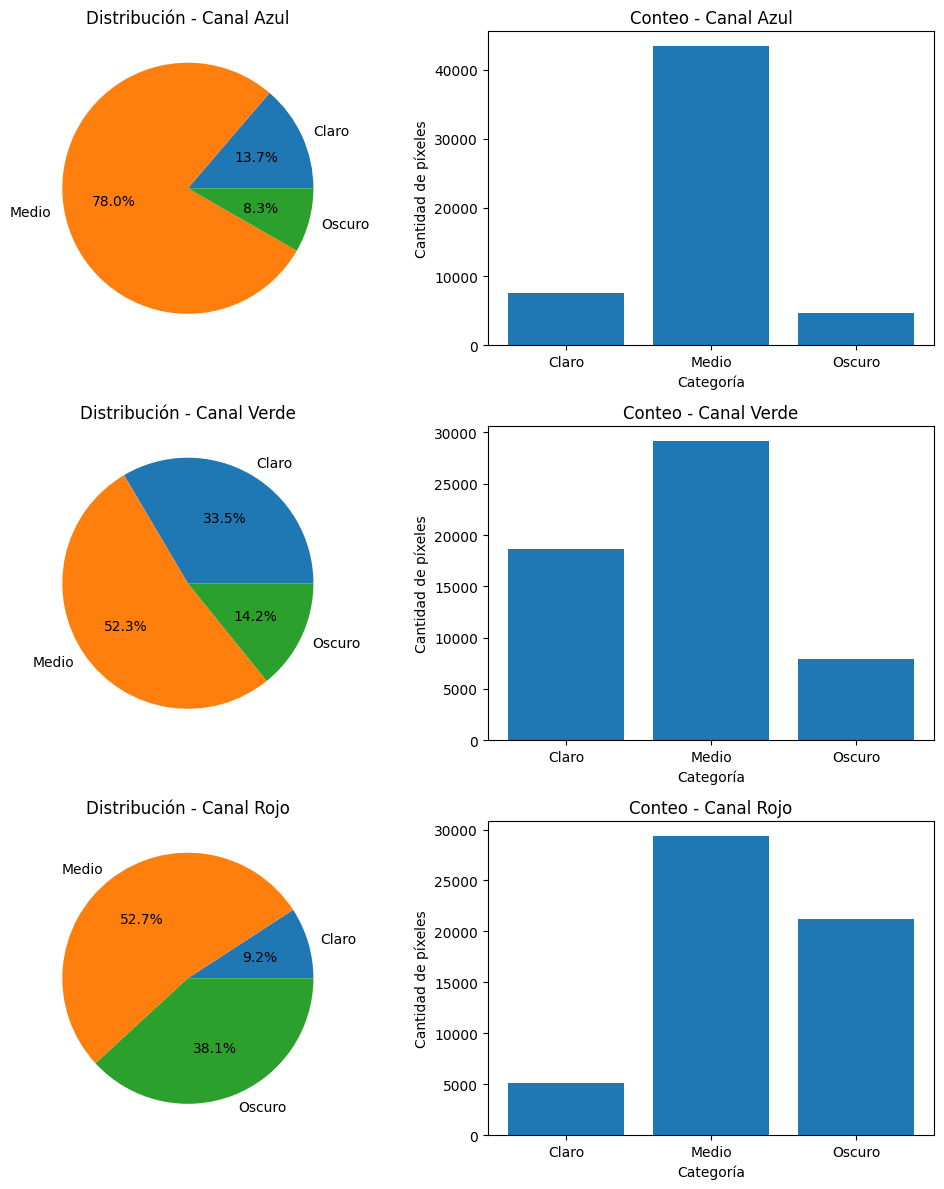

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
canales = [b_cat, g_cat, r_cat]
nombres = ["Azul", "Verde", "Rojo"]

for i, (categorias, nombre) in enumerate(zip(canales, nombres)):
    valores, conteo = np.unique(categorias, return_counts=True)
    total = conteo.sum()
    porcentajes = conteo / total * 100

    # Gráfico de torta
    ax_pie = axes[i, 0]
    ax_pie.pie(conteo, labels=valores, autopct="%1.1f%%")
    ax_pie.set_title(f"Distribución - Canal {nombre}")

    # Gráfico de barras
    ax_bar = axes[i, 1]
    ax_bar.bar(valores, conteo)
    ax_bar.set_title(f"Conteo - Canal {nombre}")
    ax_bar.set_xlabel("Categoría")
    ax_bar.set_ylabel("Cantidad de píxeles")

plt.tight_layout()
plt.show()


La imagen analizada revela una estructura equilibrada entre sus canales RGB: primero se identificó su forma (236×236×3) y luego se transformó a RGB y escala de grises para observar su composición luminosa. Al separar los canales y visualizar sus histogramas, la historia se vuelve más precisa: el canal azul mostró una media de 101.7, mediana de 102 y una moda en 0, con varianza y desviación altas que reflejan gran dispersión; su asimetría casi nula indica un comportamiento simétrico. El canal verde, más intenso, registró media de 145, mediana 159 y moda 163, con asimetría negativa marcada, señal de una caída hacia valores bajos. El rojo, con media 140.9 y desviación moderada, también mostró ligera asimetría hacia la izquierda. Luego, cada canal fue reclasificado en intensidades Oscuro–Medio–Claro, revelando un predominio claro de la categoría “Medio” en toda la imagen, lo que confirma un balance cromático sin extremos agresivos. Finalmente, los gráficos confirmaron esta tendencia: la imagen respira un tono visual uniforme, ni brillante ni sombrío, una especie de atardecer digital en equilibrio perfecto.